In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# reading data from NASDAQ fundamentals quarterly dataset; first-pass cleaning
data_raw = pd.read_csv('NAS_AAPL_quarterly.csv').reset_index().T
data_raw.columns = data_raw.iloc[1]
data = data_raw.drop(data_raw.index[1])
data = data.drop(data_raw.index[0])
data = data.reindex()
data['Fiscal Period'] = data.index
data = data.reset_index()
data.to_csv('temp.csv')
data = pd.read_csv('temp.csv', thousands=',')
data['index'] = pd.to_datetime(data['index'], format='%Y%m')
data.head()

,Unnamed: 0,index,Revenue per Share,EBITDA per Share,EBIT per Share,Earnings per Share (Diluted),EPS without NRI,Owner Earnings per Share (TTM),Free Cash Flow per Share,Operating Cash Flow per Share,...,Price-to-Graham-Number,Price-to-Intrinsic-Value-DCF (Earnings Based),Price-to-Intrinsic-Value-DCF (FCF Based),Price-to-Earnings-Power-Value,Price-to-Intrinsic-Value-Projected-FCF,Price-to-Peter-Lynch-Fair-Value,Price-to-Median-PB-Value,Price-to-Median-PS-Value,Price-to-Net-Cash,Fiscal Period
0,0,1989-03-01,0.349,0.349,0.349,0.016,0.016,0.0,0.000,0.000,...,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.27,0,198903
1,1,1989-06-01,0.359,0.359,0.359,0.026,0.026,0.0,0.000,0.000,...,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.30,0,198906
2,2,1989-09-01,0.391,-0.924,-0.924,0.045,0.045,0.0,0.000,0.000,...,1.46,0.0,0.0,0.0,0.0,0.0,0.73,0.31,0,198909
3,3,1989-12-01,0.410,0.065,0.052,0.034,0.034,0.0,0.054,0.072,...,1.16,0.0,0.0,0.0,0.0,0.0,0.56,0.24,0,198912
4,4,1990-03-01,0.379,0.069,0.056,0.037,0.037,0.0,0.073,0.085,...,1.19,0.0,0.0,0.0,0.0,0.0,0.61,0.27,0,199003


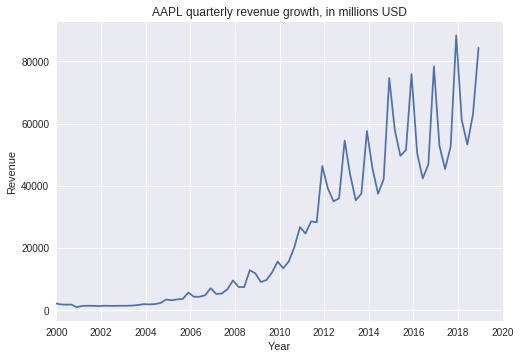

In [15]:
plt.plot(data['index'], data['Revenue'])
plt.title('AAPL quarterly revenue growth, in millions USD')
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.xlim('2000', '2020')
plt.show()

In [20]:
# let's use all fundamentals as features

from sklearn import linear_model
from sklearn.preprocessing import StandardScaler

# basic linear regression on all features, full timeline from 1988

numeric = data.select_dtypes(include='number')

X_raw = numeric.drop('Revenue', axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X_raw)
X_train = X[:-2]
X_test = X[-2:]

Y_train =  numeric['Revenue'].head(-2)
Y_test = numeric['Revenue'].tail(2)

model = linear_model.LinearRegression(normalize=True)
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

print('Predicted: ', Y_pred)
print('Actual:', Y_test.values)


Predicted:  [64405.67568945 87016.66795395]
Actual: [62900. 84310.]


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [18]:
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler

# naive linear regression on all features, starting from 2004

from2012 = data[data['index'] > '2004-01-01']
numeric = from2012.select_dtypes(include='number')

X_raw = numeric.drop('Revenue', axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X_raw)
X_train = X[:-2]
X_test = X[-2:]

Y_train =  numeric['Revenue'].head(-2)
Y_test = numeric['Revenue'].tail(2)

model = linear_model.LinearRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print('Predicted: ', Y_pred)
print('Actual:', Y_test.values)



Predicted:  [64011.2339705  84155.49088422]
Actual: [62900. 84310.]


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
